In [1]:
# Standard PySceneDetect imports:
from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.stats_manager import StatsManager

# For content-aware scene detection:
from scenedetect.detectors import ContentDetector, ThresholdDetector
from customDetector import StdDetector

import matplotlib.pyplot as plt

In [2]:
detector = StdDetector(threshold=5)

In [5]:
def find_scenes(video_path, detector=None):
    # Create our video & scene managers, then add the detector.
    video_manager = VideoManager([video_path])
    stats_manager = StatsManager()
    scene_manager = SceneManager(stats_manager)
    
    if detector is None:
        detector = StdDetector()
    scene_manager.add_detector(detector)

    # Improve processing speed by downscaling before processing.
    video_manager.set_downscale_factor()
    
    # Start the video manager and perform the scene detection.
    video_manager.start()
    scene_manager.detect_scenes(frame_source=video_manager)
    
    # Each returned scene is a tuple of the (start, end) timecode.
    return scene_manager.get_scene_list(), stats_manager


In [6]:
scenes, stats = find_scenes('../test/SlideChangeTest1.mov')
print(scenes)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2012/2015 [00:24<00:00, 82.34frames/s]

[(FrameTimecode(frame=0, fps=59.004392), FrameTimecode(frame=640, fps=59.004392)), (FrameTimecode(frame=640, fps=59.004392), FrameTimecode(frame=760, fps=59.004392)), (FrameTimecode(frame=760, fps=59.004392), FrameTimecode(frame=1480, fps=59.004392)), (FrameTimecode(frame=1480, fps=59.004392), FrameTimecode(frame=1510, fps=59.004392)), (FrameTimecode(frame=1510, fps=59.004392), FrameTimecode(frame=1940, fps=59.004392)), (FrameTimecode(frame=1940, fps=59.004392), FrameTimecode(frame=2012, fps=59.004392))]


In [7]:
def plot_scores(stats_manager):
    frame_axis = []
    metrics = {}
    for key in stats_manager._registered_metrics:
        metrics[key] = []

    for frame, val_dict in stats_manager._frame_metrics.items():
        frame_axis.append(frame)
        for key in StdDetector.METRIC_KEYS:
            metrics[key].append(val_dict[key])


    for key in StdDetector.METRIC_KEYS:
        plt.plot(frame_axis, metrics[key], label = key)      

    plt.legend()
    plt.show()

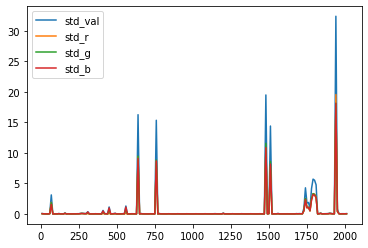

In [8]:
plot_scores(stats)

In [9]:
def select_frames(scenes, method="last"):
    assert method in ["last", "first", "middle"]
    
    if method == "last":
        return [x[1].get_frames()-1 for x in scenes]
    elif method == "first":
        return [x[0].get_frames() for x in scenes]
    elif method == "middle":
        return [(x[0].get_frames()+x[1].get_frames())//2 for x in scenes]
    
    return []
    

In [11]:
frame_lst = select_frames(scenes)
frame_lst

[639, 759, 1479, 1509, 1939, 2011]

In [31]:
def export_frames(file, frames, locater):
    cap = cv2.VideoCapture(file)
    
    # Find OpenCV version
    (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
    
    if int(major_ver)  < 3 :
        fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
    else :
        fps = video.get(cv2.CAP_PROP_FPS)
    
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    i = 0
    while (cap.isOpened() and i < len(frames)):
        j = frames[i]
        seconds = "{:.3f}".format(j / 25)
        cap.set(1, j)
        ret, frame = cap.read()
        if ret == False:
            break
        
#         cv.imwrite("./trainingDataPreprocessing/img_y/" + "{:04d}".format(i) + ".png", frame)
        cv2.imwrite("q"+str(i) + ".bmp", frame)
        i += 1
        
    cap.release()
    cv2.destroyAllWindows()


In [17]:
capture('../test/SlideChangeTest1.mov', sorted(frame_lst))